In [58]:
import numpy as np
import matplotlib.pyplot as plt 

In [59]:


lr_gd = 0.01  ## play with learning rate and epochs to see , where adam vs stochstic gd meet in performance
lr_adam = 0.1
beta_1 = 0.9
beta_2 = 0.99
epsilon = 1e-7
epochs = 600
start_point = (1.5,1.5)
decay_rate = .01

In [60]:
def quadratic_loss (x,y): #using a simple quadratic loss function
    return x**2 + 10 * y**2


def quadratic_grad(x,y):
    dx =  2  * x
    dy = 20  * y

    return np.array([dx,dy])


def gradient_descent(grad_func,lr,epochs,start_point):
    x,y = start_point
    path = [(x,y)] #list for appending x,y path
    losses = [quadratic_loss(x,y)]

    for _ in range (epochs):
        grad = grad_func(x,y)
        x -= lr * grad[0] #access dx
        y -= lr * grad[1] #access dy 

        path.append((x,y))
        losses.append(quadratic_loss(x,y))


    return np.array(path),losses 

def update_params(lr,t,decay_rate = None):

    current_lr = lr * (1/(1 + decay_rate * t))
    return current_lr








def adam_optimizer(grad_func ,lr,  epochs , beta_1, beta_2,epsilon,start_point,update_params):
    x , y = start_point
    m = np.array([0.0,0.0]) #momentum terms
    v = np.array([0.0,0.0]) # cached memory decay
    path = [(x,y)]
    losses = [quadratic_loss(x,y)]


    for t in range (1, epochs + 1):

        current_lr = update_params(lr,t,decay_rate)

        grad = grad_func(x , y)
        m = beta_1 * m + (1-beta_1) * grad
        v = beta_2 * v + (1- beta_2) * (grad ** 2)

        #corrected m ,v values (1-beta**t)
        m_hat = m / (1- beta_1 ** t)
        v_hat = v /(1 - beta_2 ** t)

        x -= current_lr * m_hat[0]/ (np.sqrt(v_hat[0]) + epsilon)
        y -= current_lr * m_hat[1]/ (np.sqrt(v_hat[1]) + epsilon)

        path.append((x,y))
        losses.append(quadratic_loss(x,y))

    return np.array(path), losses

In [61]:
def plot_paths(function,paths,labels,title):
    X,Y = np.meshgrid(np.linspace(-2,2,400), np.linspace(-2,2,400))
    Z = function(X,Y)

    plt.figure(figsize = (8,6))
    plt.contour(X,Y,Z,levels =50,cmap = 'jet')


    for path,label in zip(paths,labels):
        plt.plot(path[:,0],path[:,1],label=label)
        plt.scatter(path[0,0],path[0,1],color = 'green',label = "start")
        plt.scatter(path[-1,0],path[-1,1],color = 'red',label = "End")


    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

In [62]:
def plot_losses(losses,labels,title):
    plt.figure(figsize = (8,6))

    for loss, label in zip(losses,labels):
        plt.plot(loss,label =label)

    plt.title(title)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

In [63]:
path_gd ,losses_gd = gradient_descent(quadratic_grad,lr_gd,epochs,start_point)
path_adam , losses_adam = adam_optimizer(quadratic_grad,lr_adam,epochs,beta_1,beta_2,epsilon,start_point,update_params)

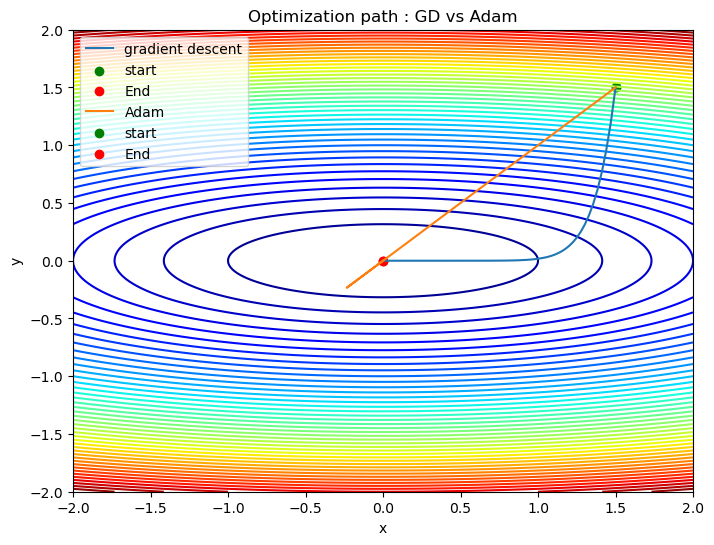

In [64]:
plot_paths(quadratic_loss,[path_gd,path_adam],["gradient descent", "Adam"],"Optimization path : GD vs Adam")

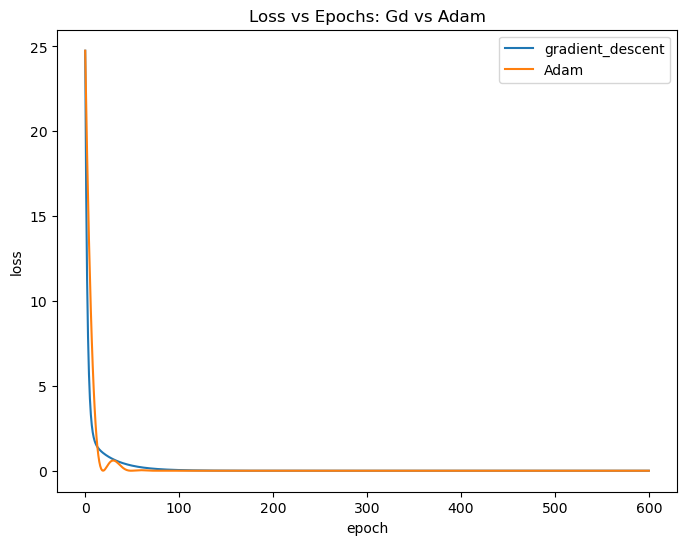

In [65]:
plot_losses([losses_gd,losses_adam],["gradient_descent","Adam"],"Loss vs Epochs: Gd vs Adam")